In [ ]:
#Problem 1-1

data
option1 = go to bar1, deliver 7 kegs and back 5+5 = 10
option2 = go to bar2, deliver 2 kegs and back 12+12 = 24
option3 = go to bar3, deliver 6 kegs and back 7+7 = 14
option4 = go to bar4, deliver 3 kegs and back 15+15 = 30
option5 = go to bar1, deliver 7 kegs and bar2, deliver 2 kegs and back 5+4+12 = 21
option6 = go to bar3, deliver 6 kegs and bar4, deliver 3 kegs and back 14+8+15 = 37
option7 = go to bar1, deliver 7 kegs and bar4, deliver 3 kegs and back 5+7+15 = 27
option8 = go to bar2, deliver 2 kegs and bar3, deliver 6 kegs and back 12+14+7 = 33


DVs
xj for j in J, J = B1, B2, B3, B4 , bin #binary constraint

Objective
min distance travelled
sum( xj*Distancej )

Constraints
x1+x5 >=1 #this constraint says that we deliver 7 kegs to bar1 then to back or go to bar 2
x2+x5+x8 >=1 #this constraint says that we deliver 2 kegs to bar2 then back, or it is visited because of constraint 5
x3+x6+x8 >=1 
x4+x6+x7 >=1

In [1]:
#Problem 1-2
using JuMP, Cbc
m=Model()

#bars = [:1,:2,:3,:4]
#required = Dict(zip(bars, [7,2,6,3]))
    
#distances = [0 5 12 7 15;
#             5 0 4 10 7;
#             12 4 0 14 20;
#             7 10 14 0 8]

#travel = Dict()
#travel[:1]=[:2, :4]
#travel[:3]=[:2, :4]

options = [:1,:2,:3,:4,:5,:6,:7,:8]
distances = Dict(zip(options, [10,24,14,30,21,37,27,33])) #distance for each trip


#DVs
@variable(m, x[options], Bin)

@objective(m, Min, sum(distances[i] * x[i] for i in options))

@constraint(m, x[1]+x[5] >= 1) #bar1
@constraint(m, x[2]+x[5]+x[8] >=1) #bar2
@constraint(m, x[3]+ x[6]+x[8]>=1) #bar3
@constraint(m, x[4]+x[6]+x[7]>=1) #bar4

#@constraint(m, sum(required[i]*x[i] for i in bars)<=10) #Beer Carry Constraint
#@constraint(m, visit_bar[i in bars], sum(x[i] for i in bars)>=1) #visit each bar
#@constraint(m, cover[i in bars, j in bars_r], sum(x[i] for i in travel[j]) >= 1)


set_optimizer(m, Cbc.Optimizer)
optimize!(m)

Welcome to the CBC MILP Solver 
Version: 2.10.8 
Build Date: Jan  1 1970 

command line - Cbc_C_Interface -solve -quit (default strategy 1)
Continuous objective value is 58 - 0.00 seconds
Cgl0004I processed model has 4 rows, 8 columns (8 integer (8 of which binary)) and 11 elements
Cutoff increment increased from 1e-05 to 0.9999
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of 58
Cbc0038I Before mini branch and bound, 8 integers at bound fixed and 0 continuous
Cbc0038I Mini branch and bound did not improve solution (0.01 seconds)
Cbc0038I After 0.01 seconds - Feasibility pump exiting with objective of 58 - took 0.00 seconds
Cbc0012I Integer solution of 58 found by feasibility pump after 0 iterations and 0 nodes (0.01 seconds)
Cbc0001I Search completed - best objective 58, took 0 iterations and 0 nodes (0.01 seconds)
Cbc0035I Maximum depth 0, 0 variables fixed on reduced cost
Cuts at root node changed objective from 58 to 58
Probing was tried 0 times an

In [ ]:
#Problem 2-1

#original
max z = 3x1 + 2x2
x1 + 2x2 <= 2
3x1 + 4x2 <= 6
x1 >= 0
x2 >= 0

#Simplex version
max z = 3x1 + 2x2
x1 + 2x2 + s1 == 2
3x1 + 4x2 + s2 == 6
x1 >= 0
x2 >= 0
s1 >= 0
s2 >= 0

PLOTTED REGION
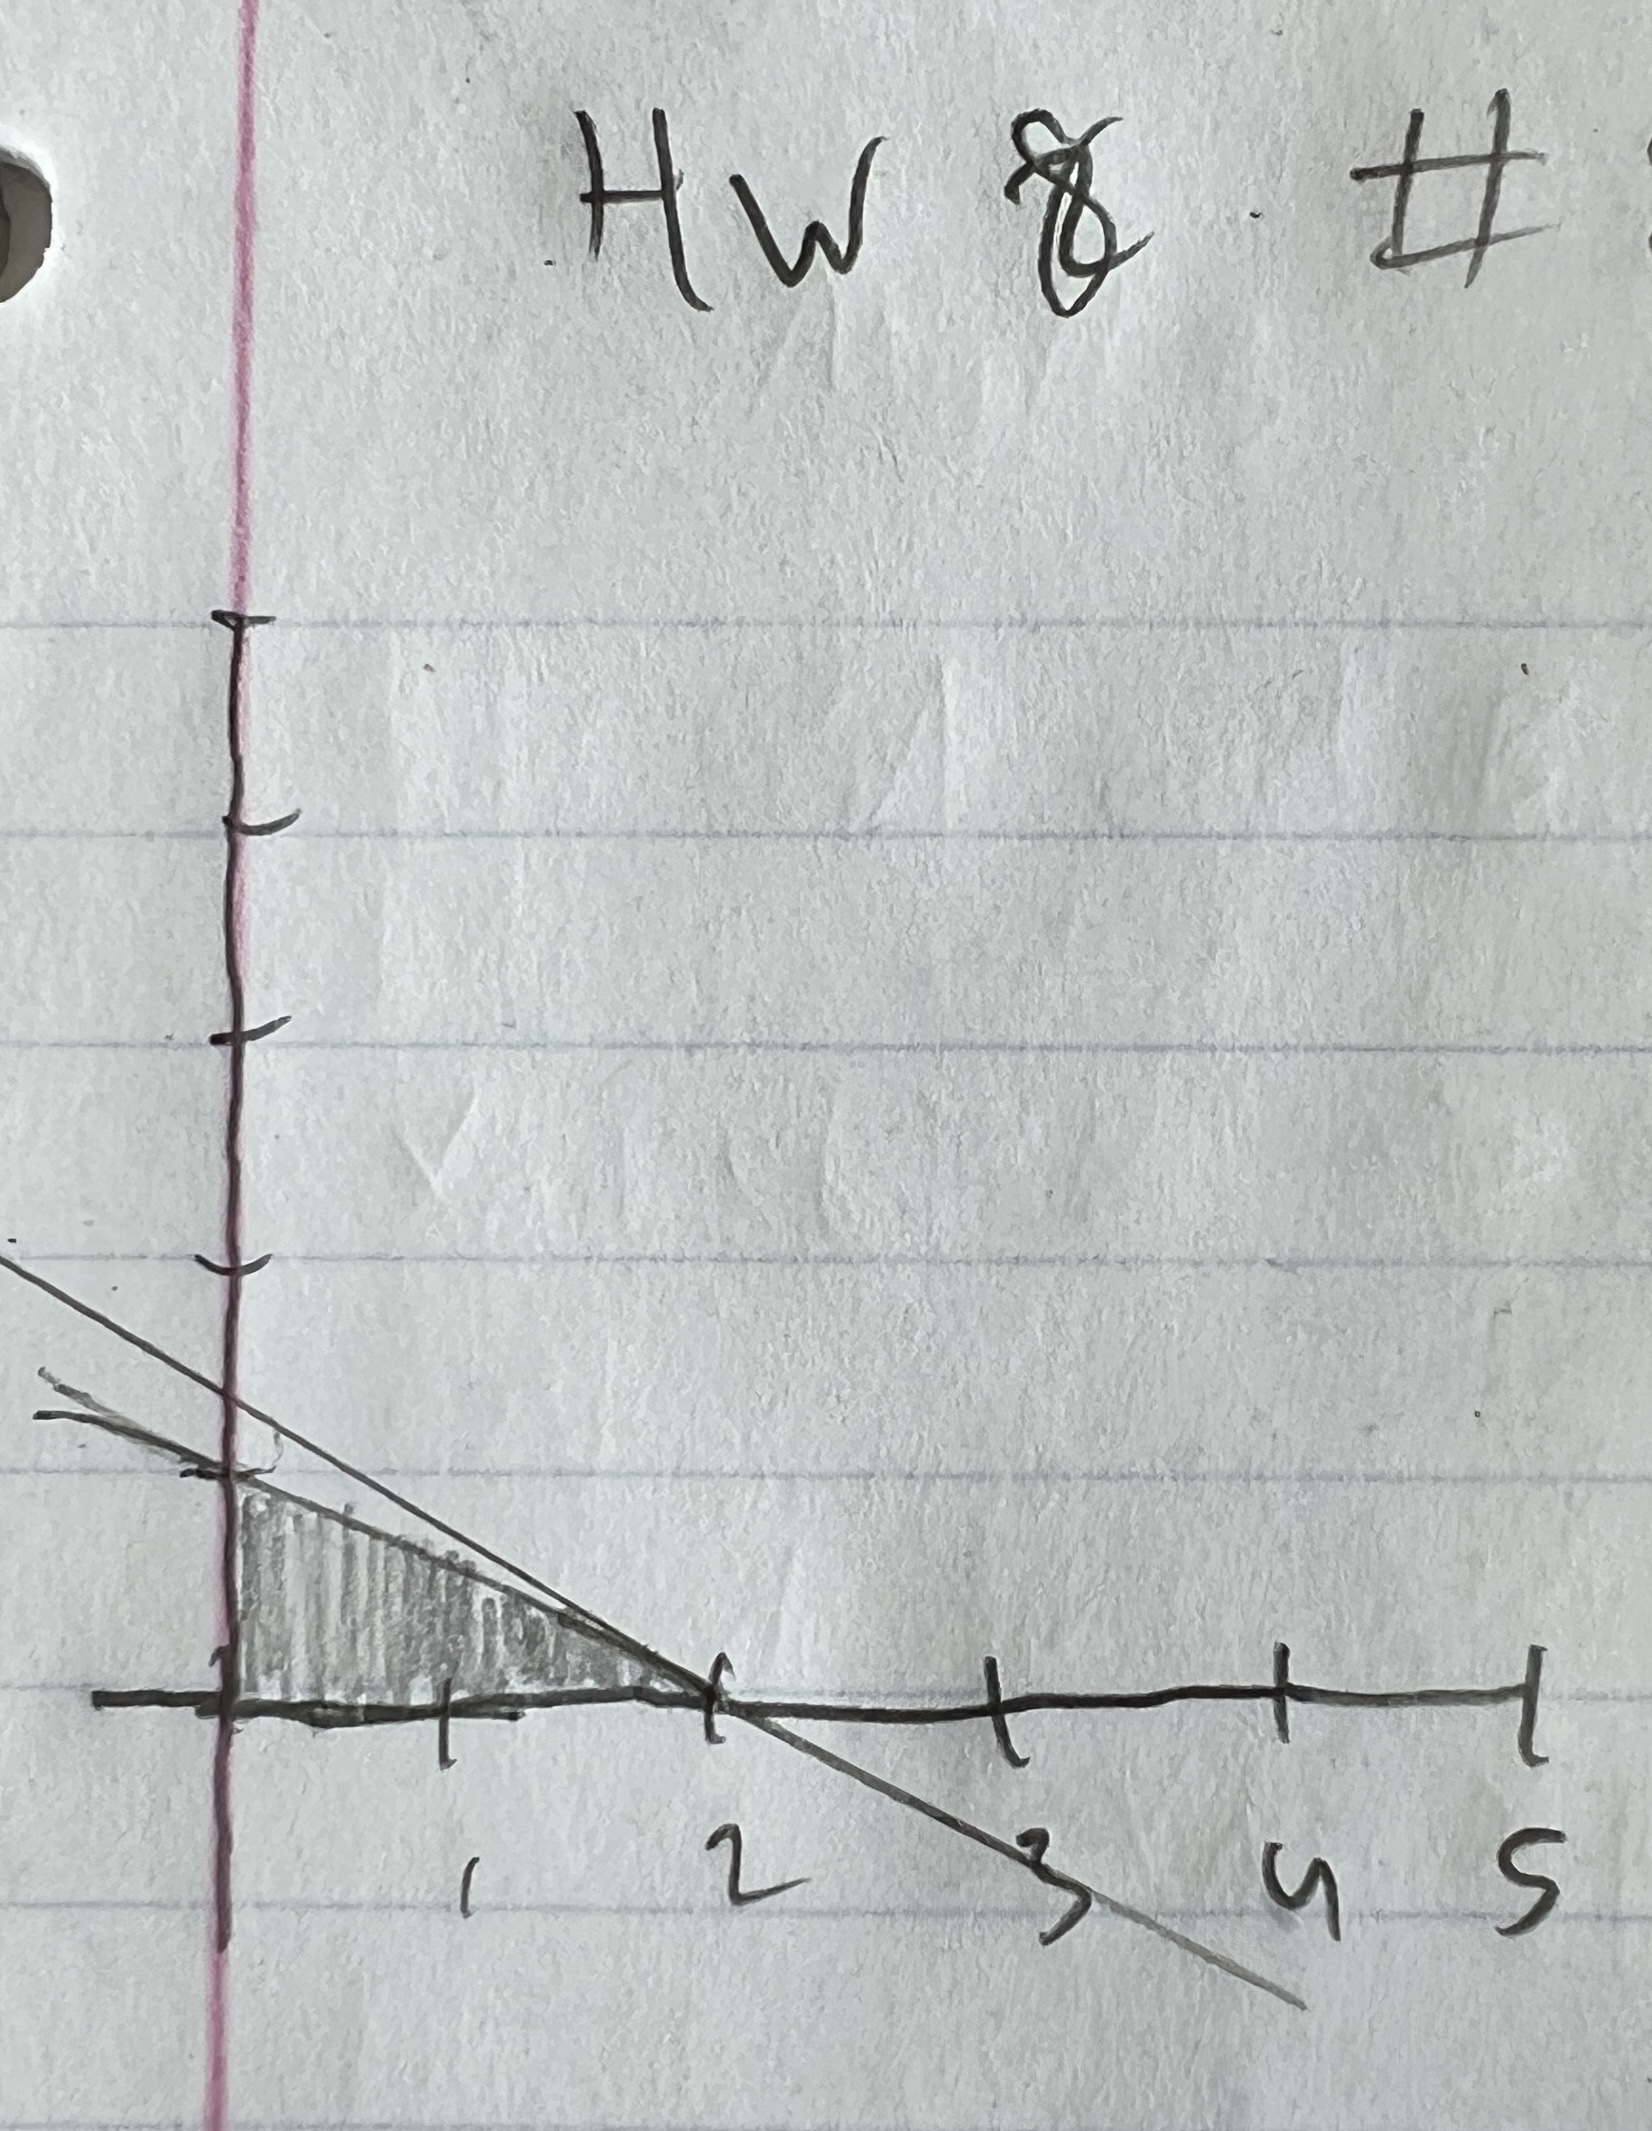

In [ ]:
#slack variable code
using JuMP, Cbc
m=Model()

@variable(m, x1 >=0)
@variable(m, x2 >=0)
@variable(m, s1 >=0)
@variable(m, s2 >= 0)

@objective(m, Max, 3x1+2x2)

@constraint(m, x1+2x2 +s1== 2)
@constraint(m, 3x1 + 4x2+s2 == 6)
@constraint(m, x1 >=0)
@constraint(m, x2 >= 0)
@constraint(m, s1 >= 0)
@constraint(m, s2 >= 0)

set_optimizer(m, Cbc.Optimizer)
optimize!(m)
solution_summary(m, verbose=true)

TABLE

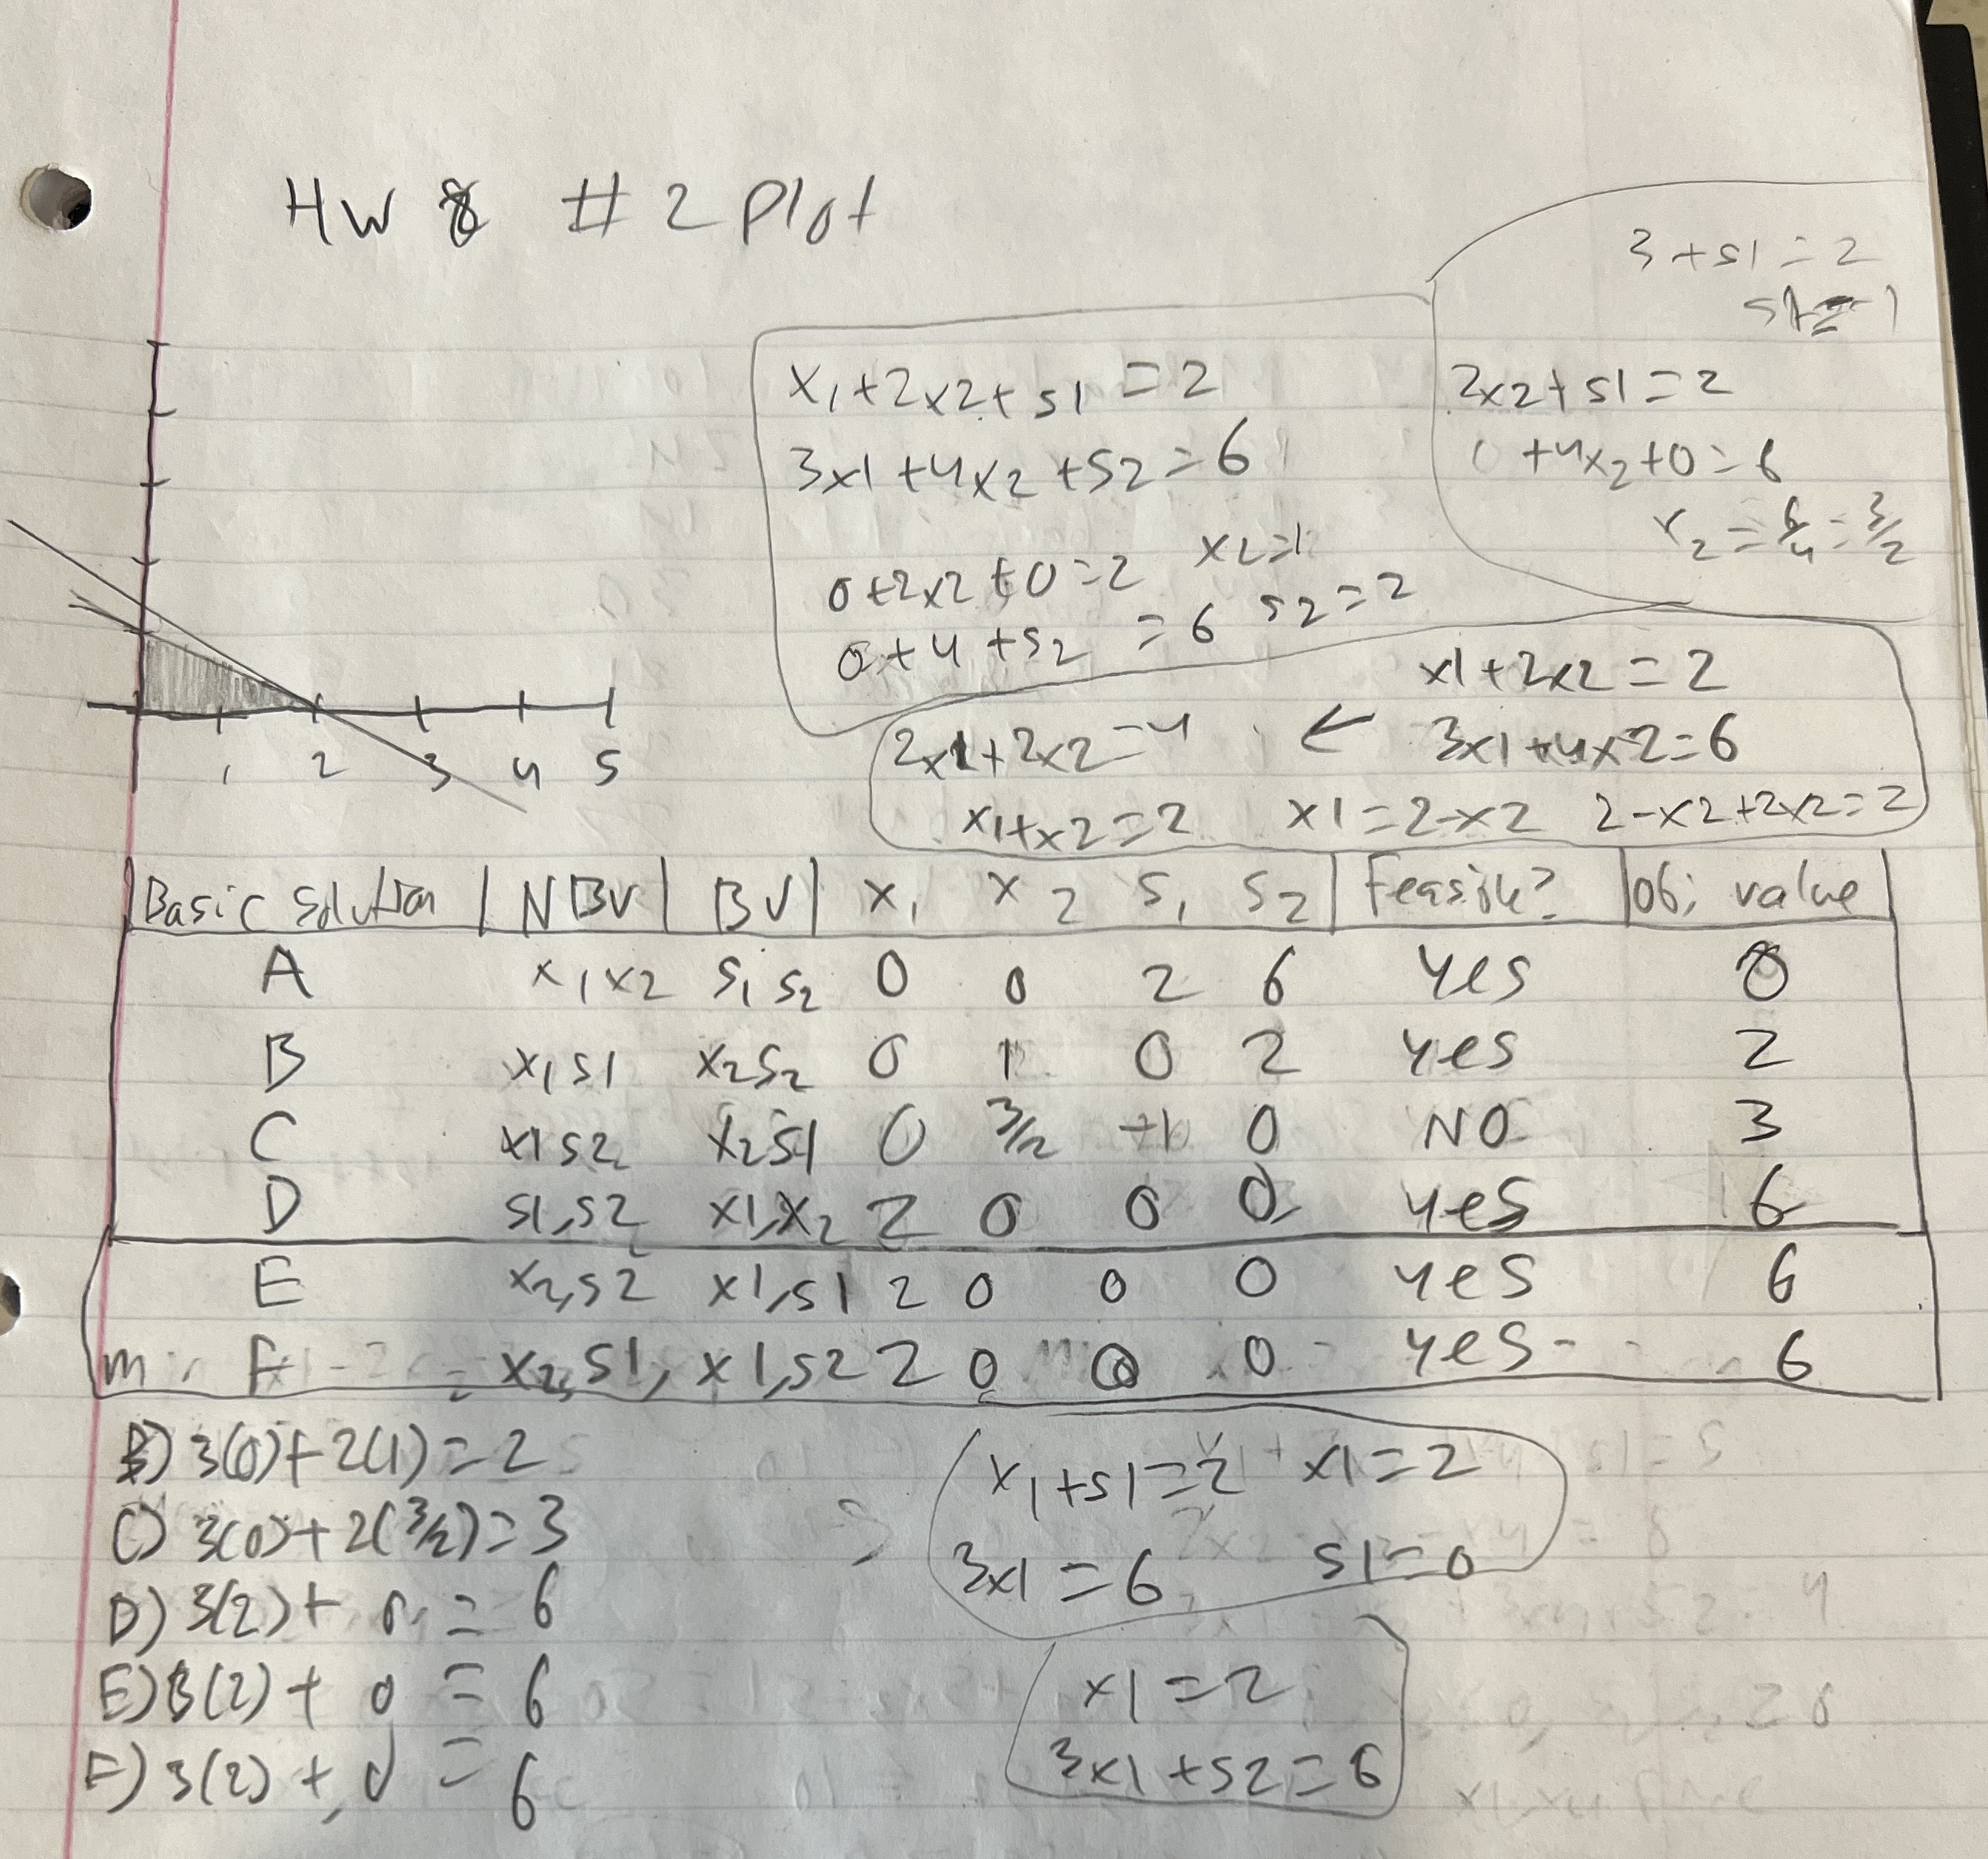

In [ ]:
#Problem 3

#Original
min x1 − 2x2 − 3x3 − 2x4

s.t.
x1 + 3x2 + x4 <= 5
2x2 − x3 − x4 = 8
3x1 − x2 + 3x4 >= 4
x2 >= 0, x3 <= 0
x1, x4 Unrestricted in Sign (Free)

#Add Slack Variable
Min x1 - 2x2 - 3x3 - 2x4

s.t.  
x1 + 3x2 + x4 + s1 =5
2x2 - x3 - x4 = 8
3x1 - x2 + 3x4 - s2 = 4
s1, s2, x2 >= 0, x3 <= 0,  x1, x4 Free

#set free variables to p - q
x1 = p1 - q1
x4 = p4 - q4

#Standard Final
Min x1 - 2x2 - 3x3 - 2x4

s.t.  
p1 - q1 + 3x2 + p4 - q4 + s1 = 5
2x2 - x3 - p4 - q4 = 8
3p1 - 3q1 - x2 + 3p4 - 3q4 - s2 = 4
s1, s2, x2, p1, q1, p4, q4 >= 0, x3 <= 0


Written Version
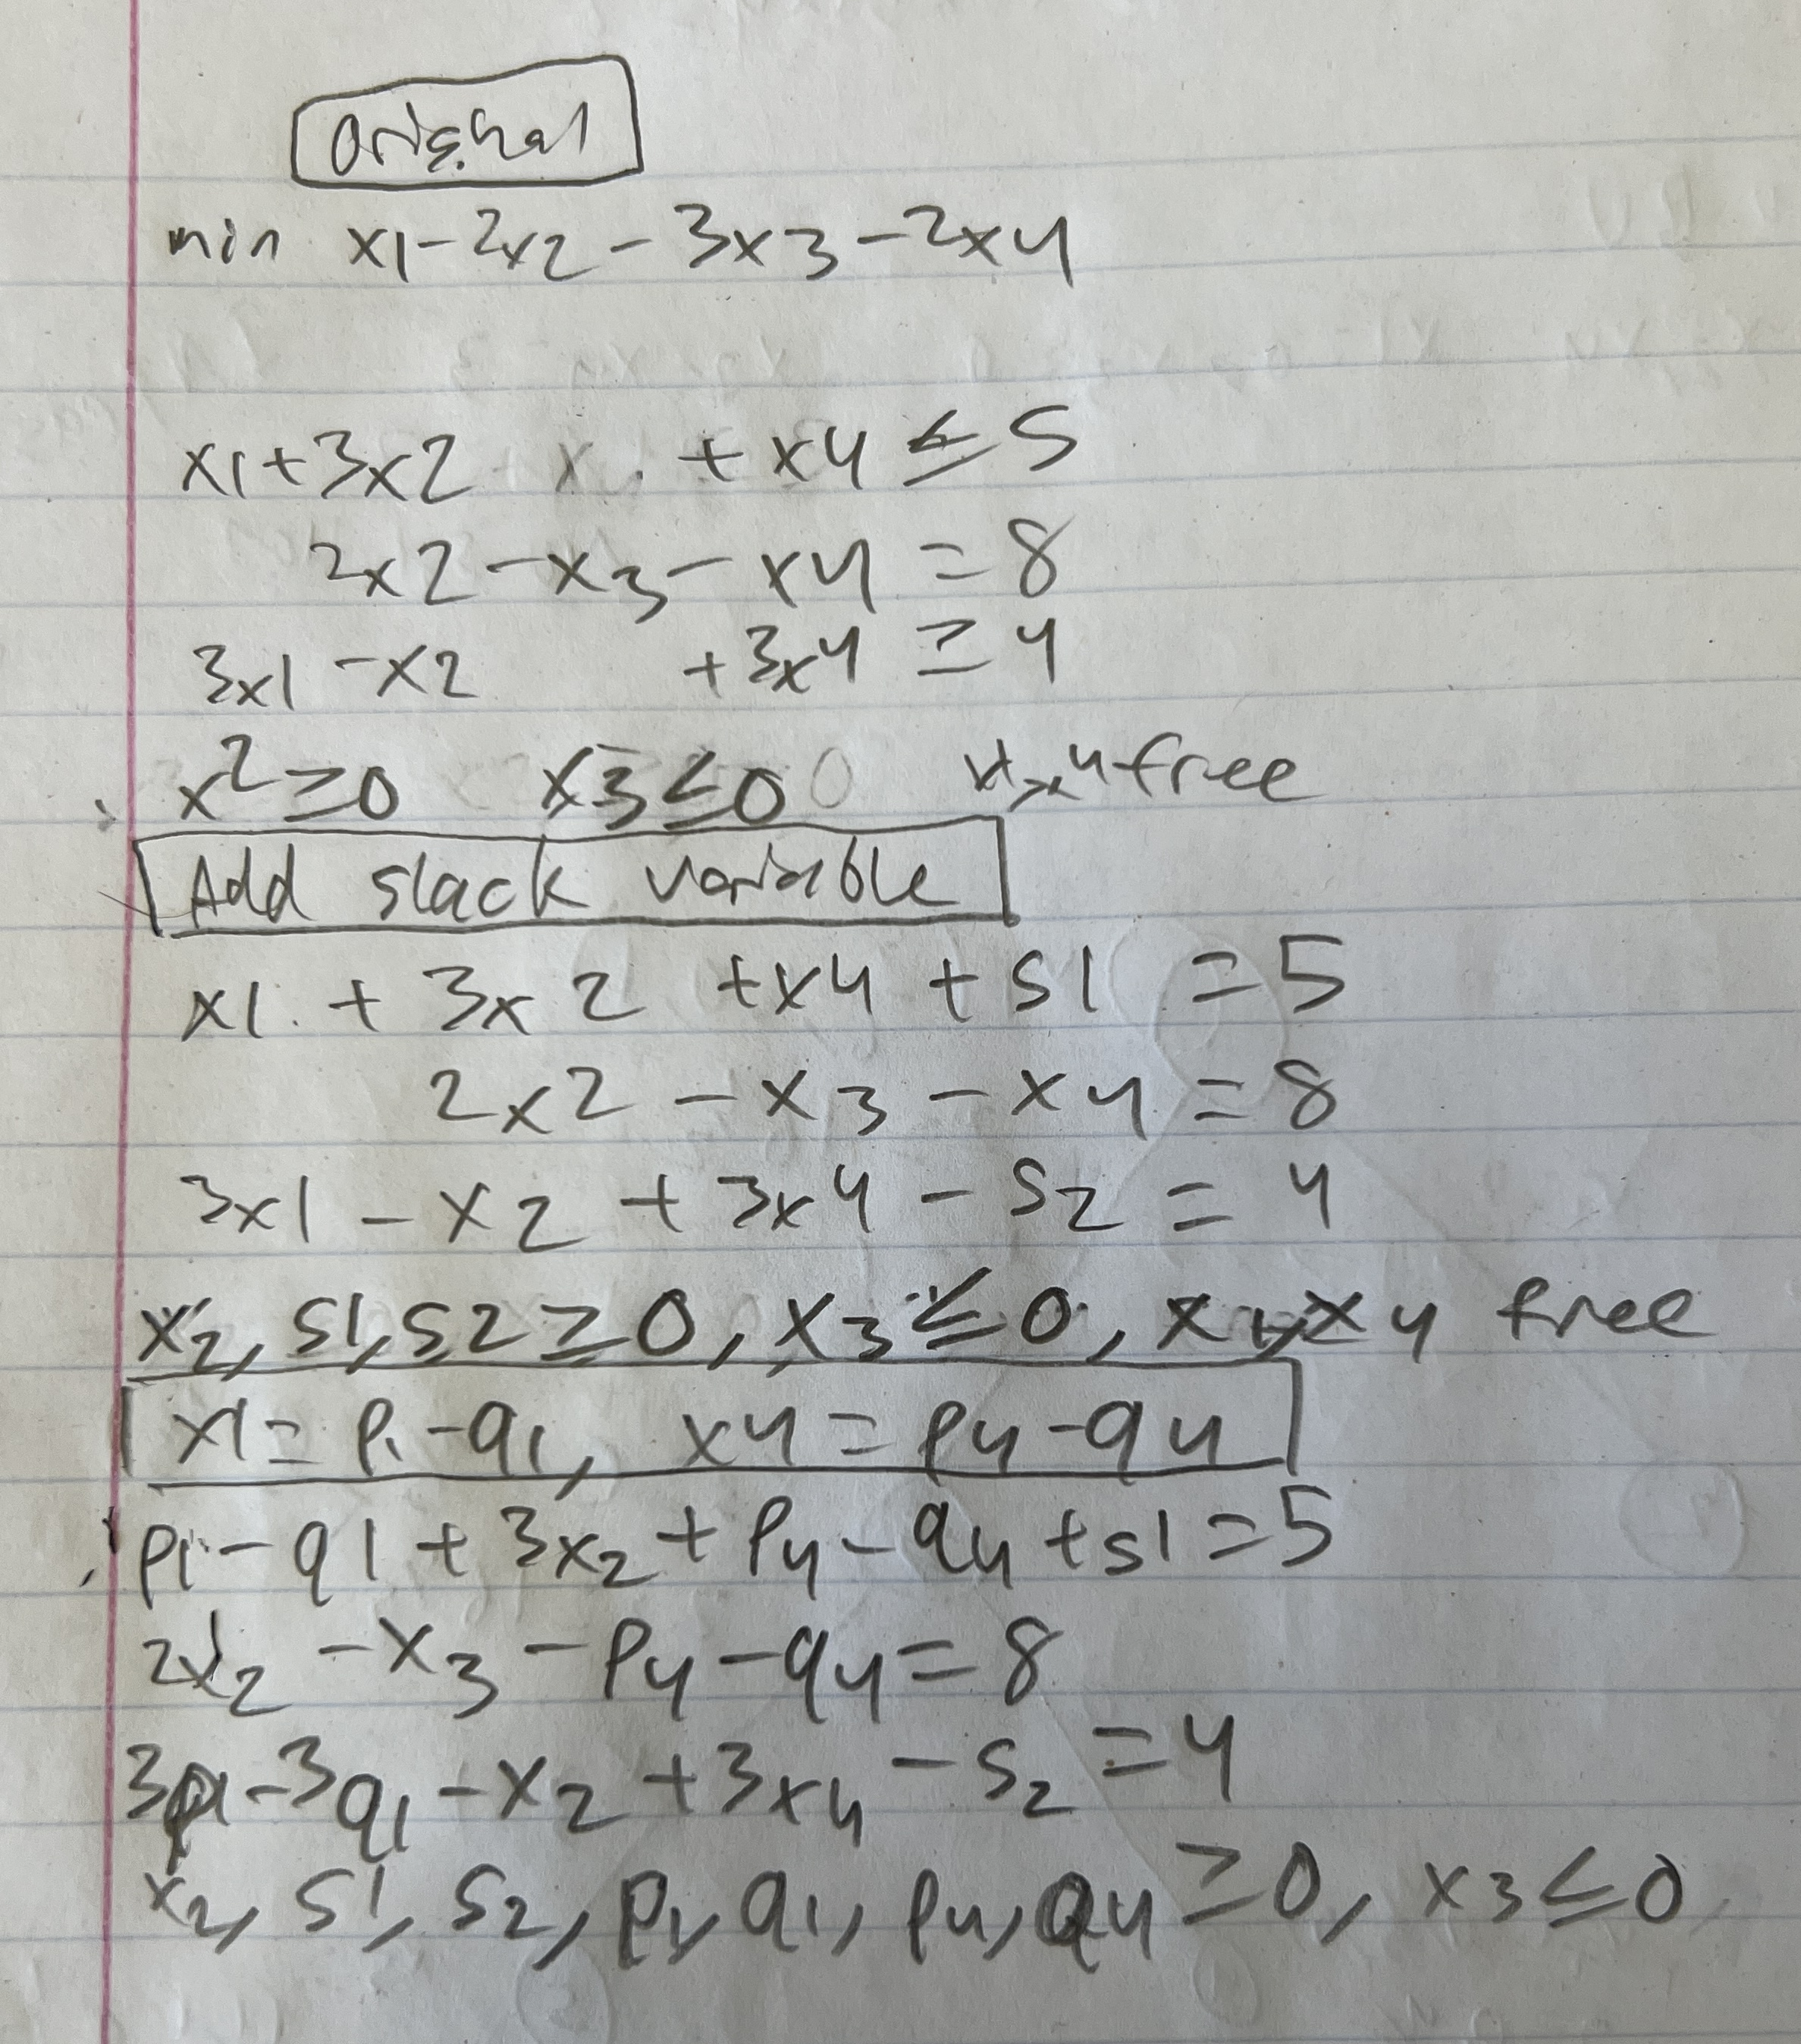

In [2]:
#Problem 4

Z = 3:6

using JuMP, Cbc
m=Model()
@variable(m, x[1:2])
@variable(m, y[Z] >=0)

@objective(m, Max, 7x[1]+18x[2]+23y[3]+21y[4]+16y[5]+12y[6])

@constraint(m, x[1] + 5x[2] + 9y[3] + 8y[4] + 2y[5] + 6y[6] >= 17)
@constraint(m, x[1] + 8x[2] + 10y[3] + 2y[4] + 10y[5] + 2y[6] <= 18)
@constraint(m, 2x[1] + 2x[2] + 2y[3] + 7y[4] + 3y[5] + 3y[6] <= 10)
@constraint(m, 3x[1] + 3x[2] + 2y[3] + 4y[4] + y[5] + y[6] <= 7)
@constraint(m, x[1:2]>= 0)
@constraint(m, y[3:6]>= 0)

@constraint(m, y[3] <= 1)
@constraint(m, y[6] >= 3)
@constraint(m, y[3] <= 0)


set_optimizer(m, Cbc.Optimizer)
optimize!(m)
solution_summary(m, verbose=true)

Presolve 3 (-10) rows, 5 (-1) columns and 15 (-18) elements
0  Obj 36 Dual inf 96.833328 (5)
1  Obj 45
Optimal - objective value 45
After Postsolve, objective 45, infeasibilities - dual 0 (0), primal 0 (0)
Optimal objective 45 - 1 iterations time 0.002, Presolve 0.00


* Solver : COIN Branch-and-Cut (Cbc)

* Status
  Result count       : 1
  Termination status : OPTIMAL
  Message from the solver:
  "Cbc_status          = finished - check isProvenOptimal or isProvenInfeasible to see if solution found (or check value of best solution)
Cbc_secondaryStatus = unset (status_ will also be -1)
"

* Candidate solution (result #1)
  Primal status      : FEASIBLE_POINT
  Dual status        : NO_SOLUTION
  Objective value    : 4.50000e+01
  Objective bound    : 4.50000e+01
  Relative gap       : 0.00000e+00
  Primal solution :
    x[1] : 0.00000e+00
    x[2] : 5.00000e-01
    y[3] : 0.00000e+00
    y[4] : 0.00000e+00
    y[5] : 0.00000e+00
    y[6] : 3.00000e+00

* Work counters
  Solve time (sec)   : 0.00000e+00
  Node count         : 0


Branch and Bound Tree, MAX Z == 59.61 | min z == 45.00

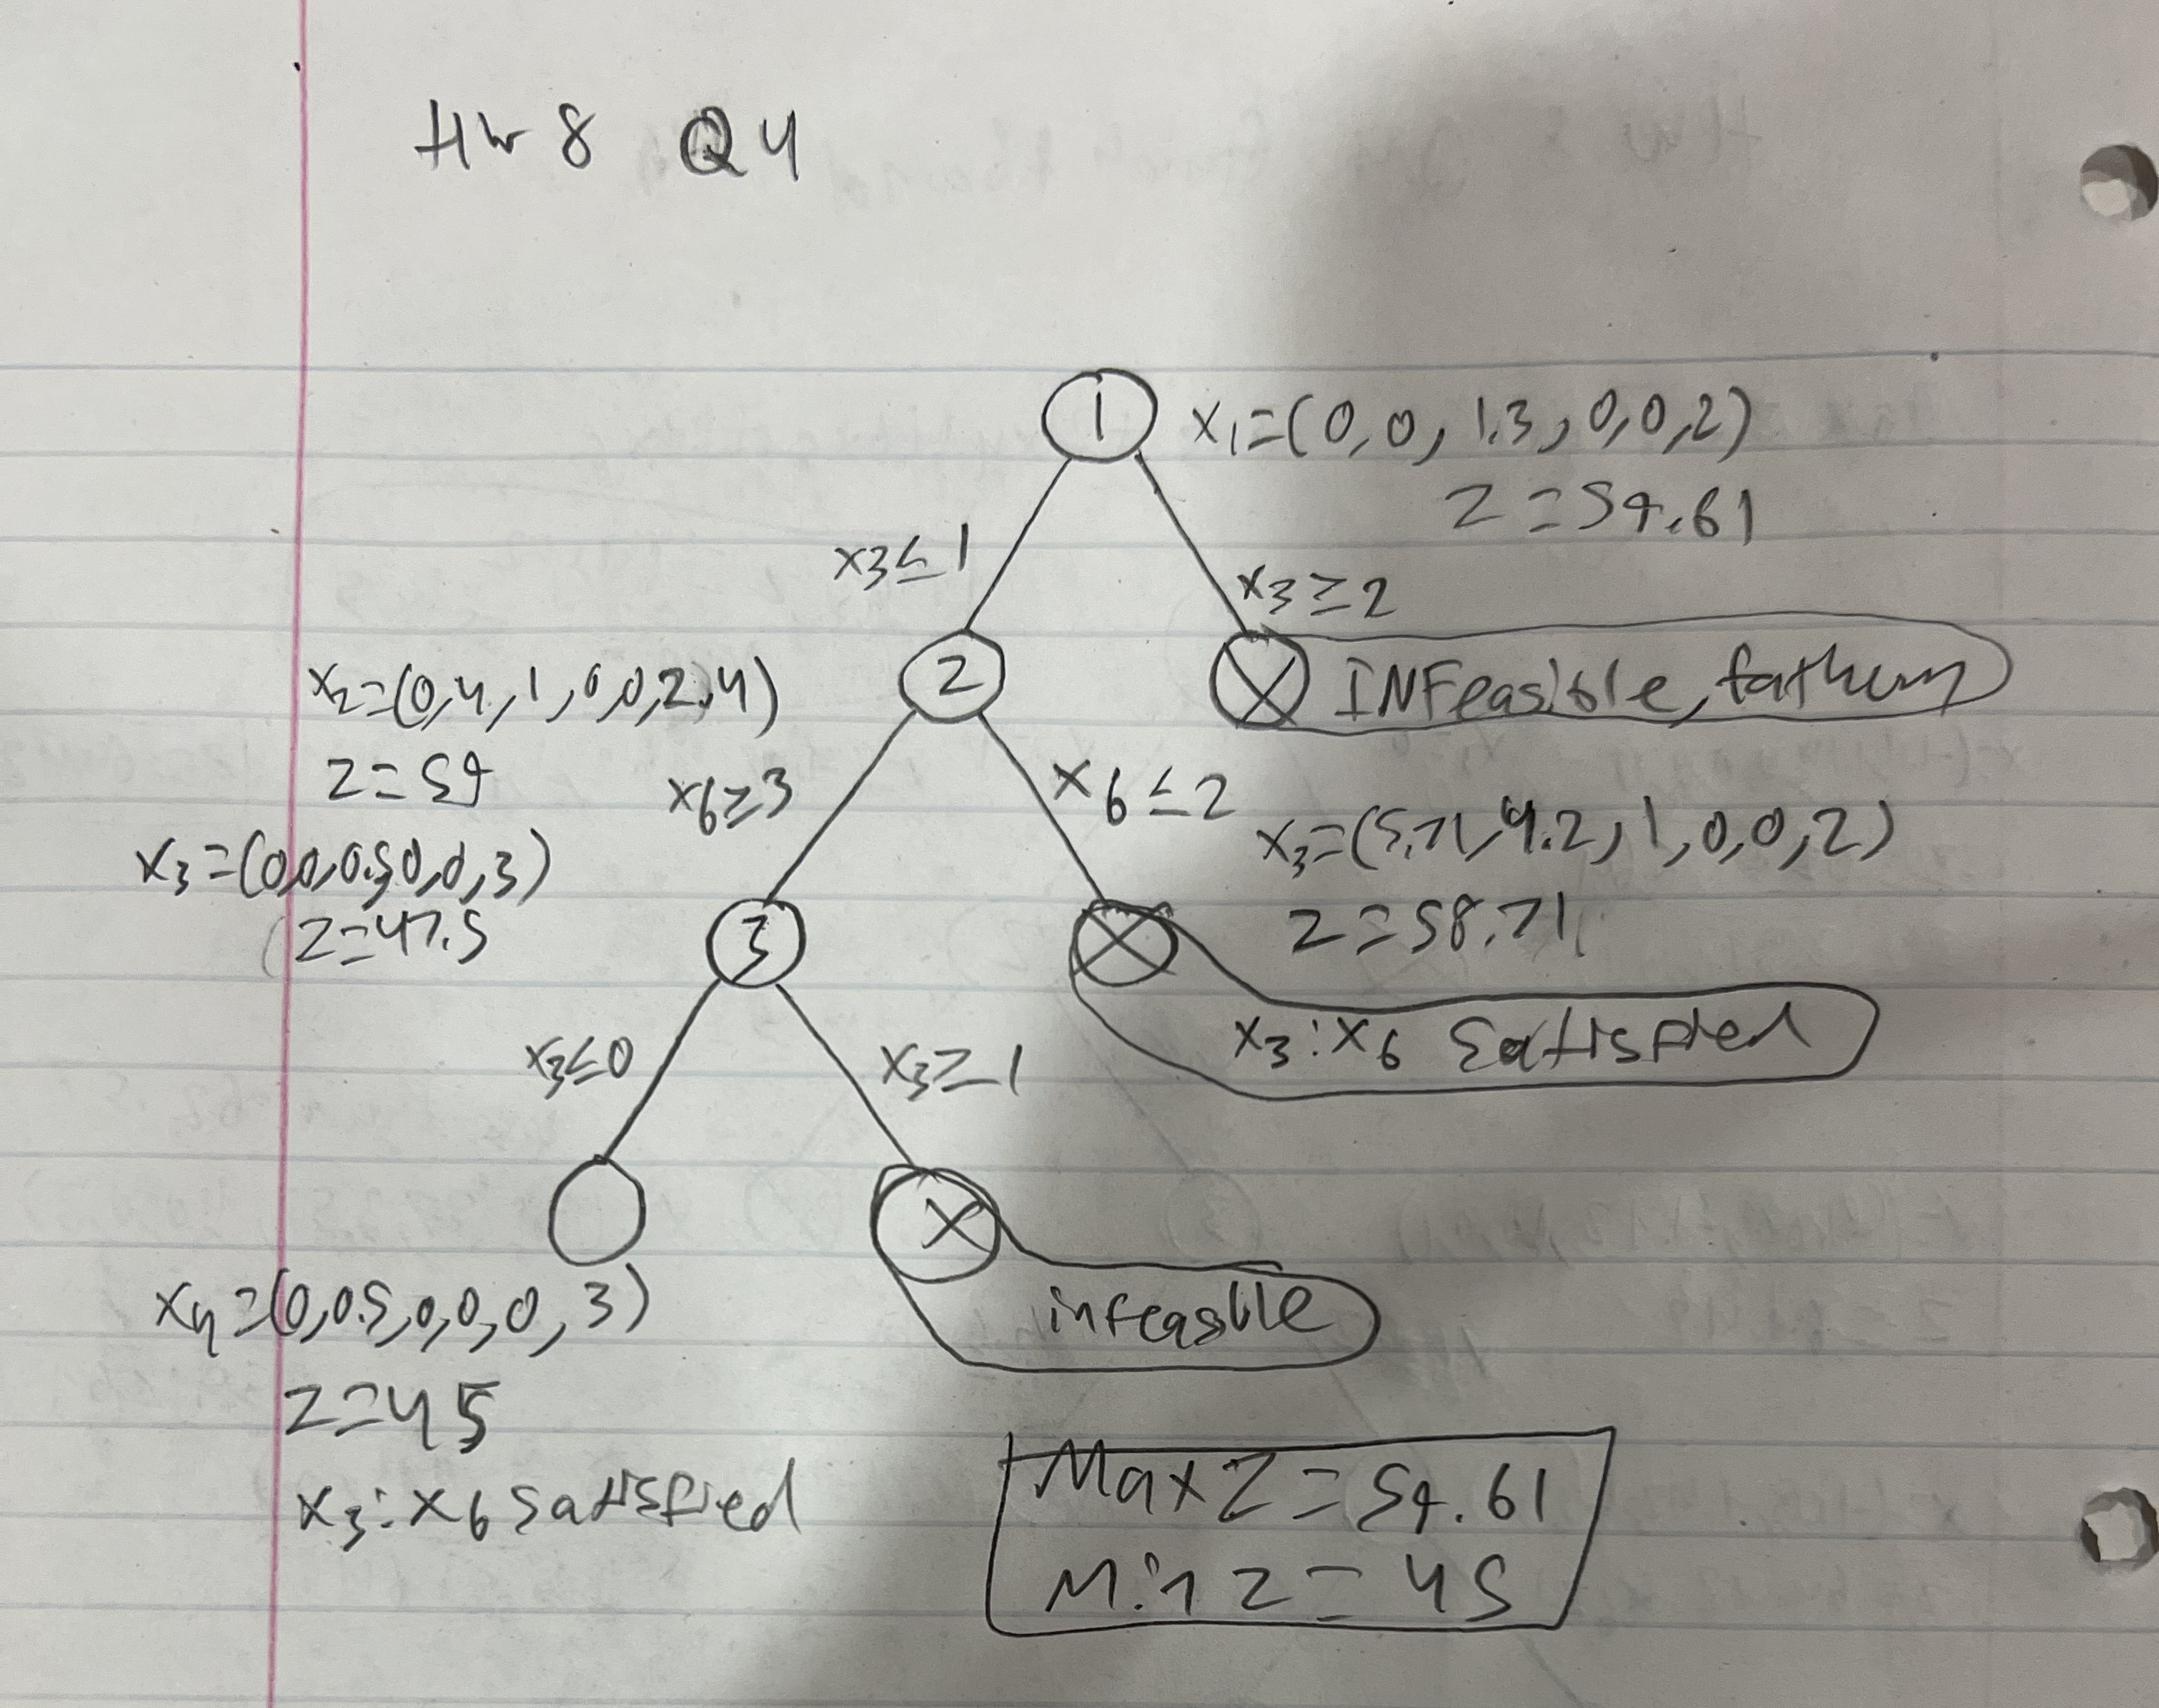